# Δεύτερη Εργασία
## Η Στήλη της Ροζέτας του Ανθρώπινου Κεφαλαίου
---
> Αλέξανδρος Πετρίδης <br/>
> al1998petridis@gmail.com

### Εγκατάσταση βιβλιοθηκών για το συγκεκριμένο jupyter notebook 

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


### Εισαγωγή χρήσιμων βιβλιοθηκών

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from plotnine import *
import seaborn as sns
import scipy.stats as stats
sns.set_theme()

### Συγκέντρωση των δεδομένων

In [3]:
country_scores = pd.read_excel('patel-sandefur-human-capital-final-results.xlsx', sheet_name=1)

wdi_data = pd.read_csv('WDI_data.csv')
wdi_data.dropna(subset=['Country Name', 'Country Code'], inplace=True)
wdi_data['2015 [YR2015]'][wdi_data['2015 [YR2015]'] == ".."] = np.nan
wdi_data['2015 [YR2015]'] = wdi_data['2015 [YR2015]'].astype("float")

train_data = pd.read_stata('BL2013_MF1599_v2.2.dta')


### Εισόδημα και Αποτελέσματα των Τεστ

#### Δεδομένα πρώτου ερωτήματος

In [4]:
# Data for question 1
timss = country_scores[['Country Code', 'Median Math Score (TIMSS Scale, 4th Grade)']].copy()
timss.dropna(inplace=True)

pirls = country_scores[['Country Code', 'Median Reading Score (PIRLS Scale, 4th Grade)']].copy()
pirls.dropna(inplace=True)

log_gdp = wdi_data[['Country Code', '2015 [YR2015]']][wdi_data['Series Code']=='NY.GDP.PCAP.PP.KD'].copy()
log_gdp.dropna(inplace=True)
log_gdp['2015 [YR2015]'] = np.log(log_gdp['2015 [YR2015]'])

df1 = log_gdp.set_index('Country Code').join(timss.set_index('Country Code'))
df1.rename(columns={'2015 [YR2015]':'log_GDP', 'Median Math Score (TIMSS Scale, 4th Grade)':'TIMSS'}, inplace=True)
df1.dropna(inplace=True)

df2 = log_gdp.set_index('Country Code').join(pirls.set_index('Country Code'))
df2.rename(columns={'2015 [YR2015]':'log_GDP', 'Median Reading Score (PIRLS Scale, 4th Grade)':'PIRLS'}, inplace=True)
df2.dropna(inplace=True)


Παρατηρήσεις:

* Στο σετ δεδομένων `wdi_data`: 
    * Διαγράφονται οι εγγραφές με κενό όνομα χώρας και κενό κωδικό χώρας καθώς δεν περιέχουν καθόλου χρήσιμη πληροφορία. 
    
    * Οι τιμές στην στύλη `2015 [YR2015]` αντί για `NaN` έχουν την συμβολοσειρά "..". Οπότε μπήκε `NaN` αντί για ".."
    
    * Ακόμα λείπουν 30 τιμές για το `GDP per capita, PPP` τις οποίες απλά διαγράφουμε καθώς δεν συσχετίζονται κάπως με τις υπόλοιπες

    * Επίσης η στήλη `2015 [YR2015]` δεν βρήσκεται σε αριθμιτική μορφή, οπότε θα χρειαστεί οι τιμές τις να μετατραπούν σε αριθμούς

* Παρατηρείται ότι στο σετ δεδομένων `country_scores`:
    * Οι `NaN` τιμές στην στήλη `Median Reading Score (PIRLS Scale, 4th Grade)` περιέχουν πληροφορία για την άλλη στήλη `Median Math Score (TIMSS Scale, 4th Grade)` και αντίστοιχα οι τιμές `NaN`  στην στήλη `Median Math Score (TIMSS Scale, 4th Grade)`  περιέχουν πληροφορία για την άλλη στήλη `Median Reading Score (PIRLS Scale, 4th Grade)` οπότε οι δεν θα διαγραφθεί καμία σειρά των δεδομένων εκ των προτέρων αλλά όταν γίνει η χρήση της κάθε πληροφορίας τότε θα έχουμε υπ'όψην μας ότι περιέχονται και `NaN` τιμές και τότε θα διαγραφθούν


Διαδικασία παλινδρόμησης μεταξύ του λογαρίθμου του εισοδήματος και (α) του σκόρ TIMSS, (β) του σκόρ PIRLS:
* Υπολογισμός του συντελεστή Pearson

* Υπολογισμός του μοντέλου παλινδρόμησης

* Δημιουργία του διαγράμματος υπολοίπων

#### Παλινδρόμηση μεταξύ του λογαρίθμου του εισοδήματος και του σκόρ TIMSS (α)

In [5]:
# Pearson coefficient
pearson1 = stats.pearsonr(x=df1['log_GDP'], y=df1['TIMSS'])
print('Pearson coefficient for ln(GDP)-TIMSS =', pearson1)

# Ols model
model1 = smf.ols("TIMSS ~ log_GDP", data=df1)
model1_res = model1.fit()
print(f"TIMSS = {model1_res.params[1]}*(log_GDP) + {model1_res.params[0]}")
print(f"Regression model R^2 = {model1_res.rsquared}")

Pearson coefficient for ln(GDP)-TIMSS = (0.5929860636632429, 5.0709236482082605e-08)
TIMSS = 41.745974460003936*(log_GDP) + 46.117041452063916
Regression model R^2 = 0.3516324716988275


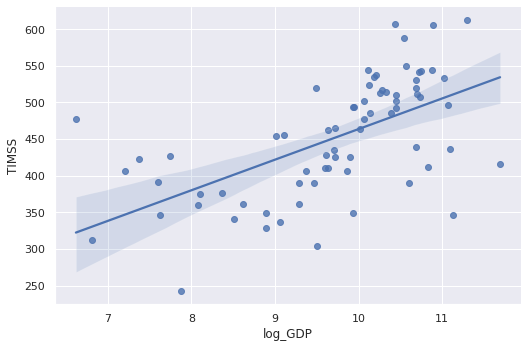

In [6]:
## Seaborn Plot
sns.lmplot(x='log_GDP', y='TIMSS', data=df1, aspect=1.5)

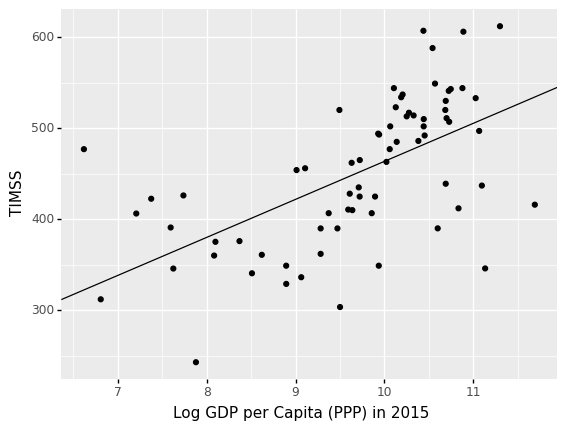

<ggplot: (8786225920332)>

In [7]:
## Asked GGPlot
ggplot(data=df1) +\
    geom_point(mapping=aes(x='log_GDP', y='TIMSS')) +\
    geom_abline(intercept=model1_res.params['Intercept'], slope=model1_res.params['log_GDP']) +\
    labs(x="Log GDP per Capita (PPP) in 2015", y="TIMSS")

In [8]:
model1_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.342   
Dependent Variable: TIMSS            AIC:                796.5024
Date:               2022-05-02 20:53 BIC:                801.0278
No. Observations:   71               Log-Likelihood:     -396.25 
Df Model:           1                F-statistic:        37.42   
Df Residuals:       69               Prob (F-statistic): 5.07e-08
R-squared:          0.352            Scale:              4241.6  
------------------------------------------------------------------
              Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
Intercept    46.1170   66.7336  0.6911  0.4918  -87.0128  179.2469
log_GDP      41.7460    6.8243  6.1173  0.0000   28.1319   55.3600
-----------------------------------------------------------------
Omnibus:               1.225        Durbin-Watson:          1.866
Prob(Omnibus):         0.542        Jarque-Bera (JB):       1.078
Skew:                  -0.298       Prob(JB):               0.583
Kurtosis:              2.898        Condition No.:          85   
=================================================================

"""

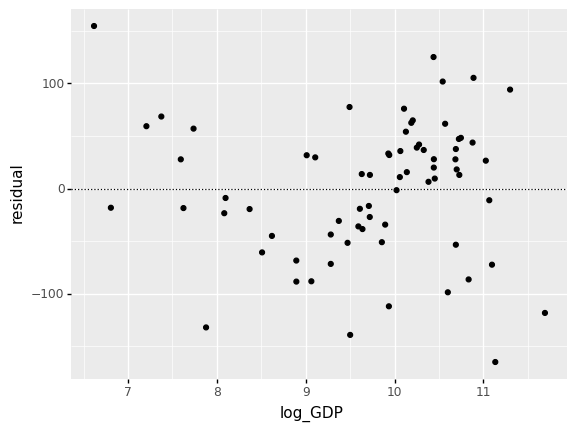

<ggplot: (8786225852046)>

In [9]:
## Residual Plot
ggplot(data=df1) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
        geom_point(mapping=aes(x=df1['log_GDP'], y=model1_res.resid)) +\
             ylab('residual') 

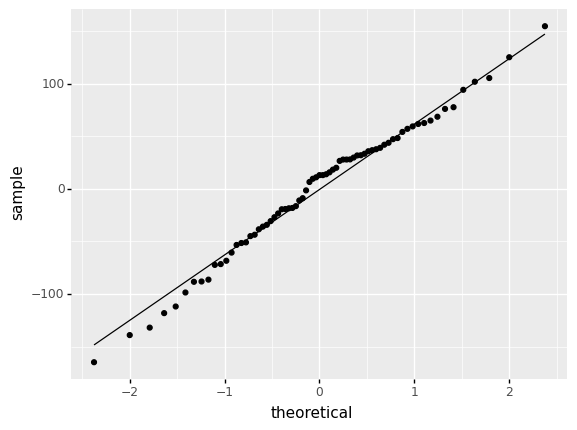

<ggplot: (8786225835367)>

In [10]:
## Quantile-Quantile Plot
ggplot(data=model1_res.resid.to_frame().rename(columns={0: 'resid'})) +\
    geom_qq(mapping=aes(sample='resid')) +\
        geom_qq_line(mapping=aes(sample='resid'))


#### Παλινδρόμηση μεταξύ του λογαρίθμου του εισοδήματος και του σκόρ PIRLS (β)

In [11]:
# Pearson coefficient
pearson2 = stats.pearsonr(x=df2['log_GDP'], y=df2['PIRLS'])
print('Pearson coefficient for ln(GDP)-PIRLS =', pearson2)

# Ols model
model2 = smf.ols("PIRLS ~ log_GDP", data=df2)
model2_res = model2.fit()
print(f"PIRLS = {model2_res.params[1]}*(log_GDP) + {model2_res.params[0]}")
print(f"Regression model R^2 = {model2_res.rsquared}")


Pearson coefficient for ln(GDP)-PIRLS = (0.6762226118838529, 2.4787369620437173e-10)
PIRLS = 43.91241482709157*(log_GDP) + 42.61912688056363
Regression model R^2 = 0.4572770208230199


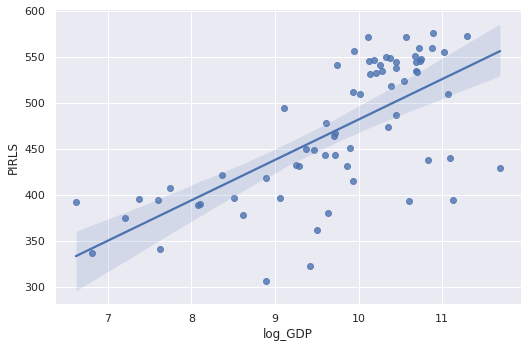

In [12]:
## Seaborn Plot
sns.lmplot(x='log_GDP', y='PIRLS', data=df2, aspect=1.5)

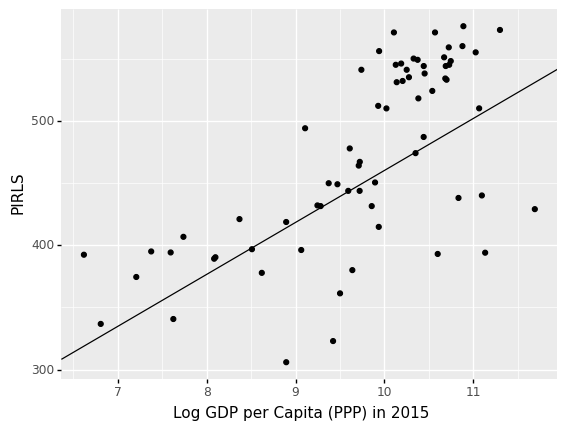

<ggplot: (8786225757787)>

In [13]:
## Asked GGPlot
ggplot(data=df2) +\
    geom_point(mapping=aes(x='log_GDP', y='PIRLS')) +\
    geom_abline(intercept=model2_res.params['Intercept'], slope=model1_res.params['log_GDP']) +\
    geom_abline(intercept=0, slope=1, color='blue') +\
    labs(x="Log GDP per Capita (PPP) in 2015")

In [14]:
model2_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.449   
Dependent Variable: PIRLS            AIC:                739.9415
Date:               2022-05-02 20:53 BIC:                744.3805
No. Observations:   68               Log-Likelihood:     -367.97 
Df Model:           1                F-statistic:        55.61   
Df Residuals:       66               Prob (F-statistic): 2.48e-10
R-squared:          0.457            Scale:              3024.9  
------------------------------------------------------------------
              Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
Intercept    42.6191   57.7897  0.7375  0.4634  -72.7618  158.0001
log_GDP      43.9124    5.8886  7.4571  0.0000   32.1554   55.6695
-----------------------------------------------------------------
Omnibus:              10.020       Durbin-Watson:          2.089 
Prob(Omnibus):        0.007        Jarque-Bera (JB):       10.389
Skew:                 -0.951       Prob(JB):               0.006 
Kurtosis:             3.226        Condition No.:          86    
=================================================================

"""

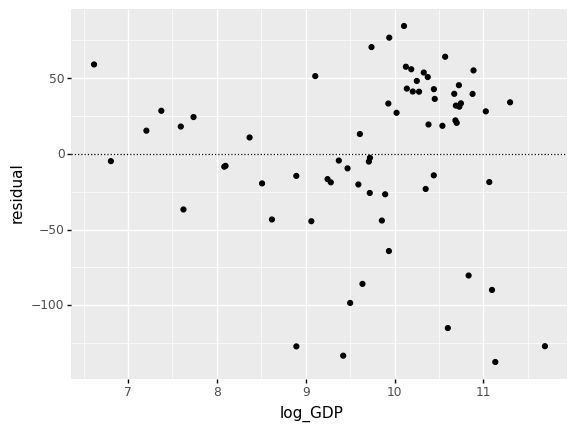

<ggplot: (8786225700919)>

In [15]:
## Residual Plot
ggplot(data=df2) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
        geom_point(mapping=aes(x=df2['log_GDP'], y=model2_res.resid)) +\
             ylab('residual') 

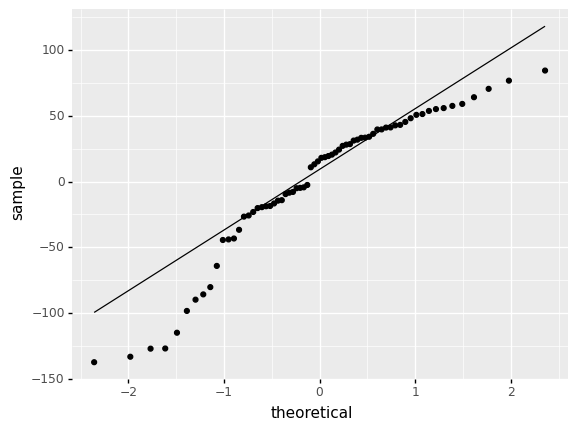

<ggplot: (8786225702461)>

In [16]:
## Quantile-Quantile Plot
ggplot(data=model2_res.resid.to_frame().rename(columns={0: 'resid'})) +\
    geom_qq(mapping=aes(sample='resid')) +\
        geom_qq_line(mapping=aes(sample='resid'))


#### Παρατηρήσεις

Αποτελέσματα παλινδρόμησης:
* Από τους συντελεστές pearson συμπερένεται πως στα δεδομένα υπάρχει κάποια ένδειξη για γραμμικότητα.

* Από τα αποτελέσματα του μοντέλου παλινδρόμησης προκύπτουν καλές τιμές για την μετρική καλής προσαρμογής R^2, η οποία υποδεικνύει πόσο καλά ταιρίαζουν τα δεδομένα στο μοντέλο.
    * Στο (α) παρατηρείται `R^2 = 0.3516324716988275` άρα το μοντέλο εξηγεί το `35,16 %` της διακύμανσης του `TIMSS` με βάση το `GPD`.

    * Στο (β) παρατηρείται `R^2 = 0.45727702082302` άρα το μοντέλο εξηγεί το `45,72 %` της διακύμανσης του `PIRLS` με βάση το `GPD`.

* Από τα διαγράμματα υπολοίπων:
    * Στο (α) δεν παρατηρείται κάποια κανονικότητα, οπότε τα δεδομένα είναι <em>ομοσκεδαστικά</em>, δηλαδή δεν εξαρτώνται από την ανεξάρτητη μεταβλητή.

    * Στο (β) δεν παρατηρείται κάποια κανονικότητα, οπότε τα δεδομένα είναι <em>ομοσκεδαστικά</em>, δηλαδή δεν εξαρτώνται από την ανεξάρτητη μεταβλητή.


* Από τα διαγράματα QQ αν τα υπόλοιπα ακολουθούν την κανονική κατανομή υπάρχει μια επιπλέον παραδοχή ελέγχου του μοντέλου της γραμμικής παλινδρόμησης:
    * Στο (α) παρατηρείται πως τα σημεία της γραφικής παράστασης πέφτουν πάνω στη διαγώνιο, άρα τα υπόλοιπα ακολουθούν την κανονική κατανομή.

    * Στο (β) παρατηρείται πως τα σημεία της γραφικής παράστασης <em>δεν</em> πέφτουν ακριβώς πάνω στη διαγώνιο, όμως δεν έχουν και μεγάλη απόκλιση έτσι χωρίς μεγάλο σφάλμα θα μπορούσε να αναφερθεί ότι τα υπόλοιπα πλησιάζουν προς την κανονική κατανομή.


### Χρόνια Εκπαίδευσης και Αποτελέσματα στα Τεστ

#### Δεδομένα δεύτερου ερωτήματος

In [17]:
# Data for question 2
data_2 = train_data[train_data['year']==2010]
data_2 = data_2[['WBcode', 'yr_sch']]

df3 = log_gdp.set_index('Country Code').join(data_2.set_index('WBcode'))
df3.rename(columns={'2015 [YR2015]':'log_GDP'}, inplace=True)
df3.dropna(inplace=True)

#### Παλινδρόμηση μεταξύ του εισοδήματος και των χρόνων εκπαίδευσης

In [18]:
# Pearson coefficient
pearson3 = stats.pearsonr(x=df3['yr_sch'], y=df3['log_GDP'])
print('Pearson coefficient for ln(GDP)-yr_sch =', pearson3)

# Ols model
model3 = smf.ols("log_GDP ~ yr_sch", data=df3)
model3_res = model3.fit()
print(f"log_GDP = {model3_res.params[1]}*(yr_sch) + {model3_res.params[0]}")
print(f"Regression model R^2 = {model3_res.rsquared}")

Pearson coefficient for ln(GDP)-yr_sch = (0.7823604694733689, 9.394179176553502e-30)
log_GDP = 0.34053146653157024*(yr_sch) + 6.4976676059020795
Regression model R^2 = 0.6120879041945902


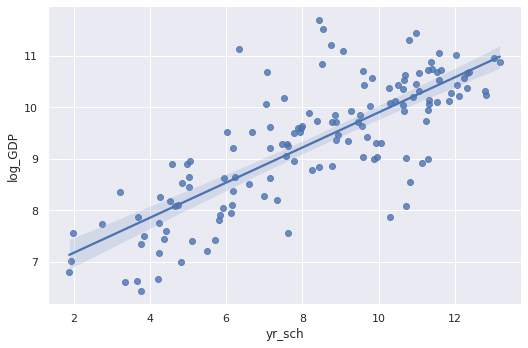

In [19]:
## Seaborn Plot
sns.lmplot(x='yr_sch', y='log_GDP', data=df3, aspect=1.5)

In [20]:
model3_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.609   
Dependent Variable: log_GDP          AIC:                324.3690
Date:               2022-05-02 20:53 BIC:                330.2235
No. Observations:   138              Log-Likelihood:     -160.18 
Df Model:           1                F-statistic:        214.6   
Df Residuals:       136              Prob (F-statistic): 9.39e-30
R-squared:          0.612            Scale:              0.60546 
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    6.4977     0.2039   31.8607   0.0000   6.0944   6.9010
yr_sch       0.3405     0.0232   14.6491   0.0000   0.2946   0.3865
-----------------------------------------------------------------
Omnibus:              7.191        Durbin-Watson:           2.042
Prob(Omnibus):        0.027        Jarque-Bera (JB):        9.680
Skew:                 0.275        Prob(JB):                0.008
Kurtosis:             4.175        Condition No.:           27   
=================================================================

"""

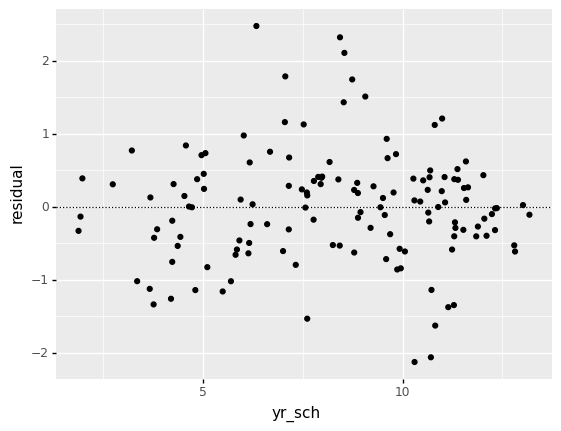

<ggplot: (8786225604612)>

In [21]:
## Residual Plot
ggplot(data=df3) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
        geom_point(mapping=aes(x=df3['yr_sch'], y=model3_res.resid)) +\
             ylab('residual') 

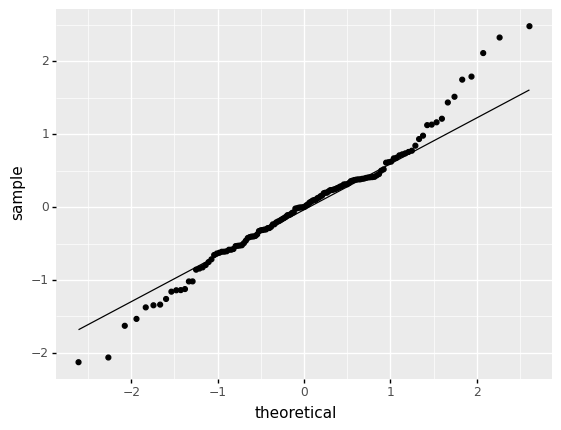

<ggplot: (8786225604801)>

In [22]:
## Quantile-Quantile Plot
ggplot(data=model3_res.resid.to_frame().rename(columns={0: 'resid'})) +\
    geom_qq(mapping=aes(sample='resid')) +\
        geom_qq_line(mapping=aes(sample='resid'))

#### Παλινδρόμηση μεταξύ των υπολοίπων

##### Δεδομένα υπολοίπων

In [23]:
# Residualized data
resid_of_TIMSS = pd.Series(model1_res.resid, name='resid_TIMSS')
resid_of_PIRLS = pd.Series(model2_res.resid, name='resid_PIRLS')
resid_of_yr = pd.Series(model3_res.resid, name='resid_yrs')

df4 = pd.concat([resid_of_yr, resid_of_TIMSS], axis=1)
df4.dropna(inplace=True)

df5 = pd.concat([resid_of_yr, resid_of_PIRLS], axis=1)
df5.dropna(inplace=True)

##### Παλινδρόμηση μεταξύ των υπολοίπων των χρόνων εκπαίδευσης και του σκορ TIMSS (γ)

In [24]:
# Pearson coefficient
pearson4 = stats.pearsonr(x=df4['resid_yrs'], y=df4['resid_TIMSS'])
print('Pearson coefficient for resid_TIMSS-resid_yrs =', pearson4)

# Ols model
model4 = smf.ols("resid_TIMSS ~ resid_yrs", data=df4)
model4_res = model4.fit()
print(f"resid_TIMSS = {model4_res.params[1]}*(resid_yrs) + {model4_res.params[0]}")
print(f"Regression model R^2 = {model4_res.rsquared}")

Pearson coefficient for resid_TIMSS-resid_yrs = (-0.44073719648513154, 0.00023841374551179732)
resid_TIMSS = -41.30569550454998*(resid_yrs) + 9.077432726149972
Regression model R^2 = 0.19424927636557332


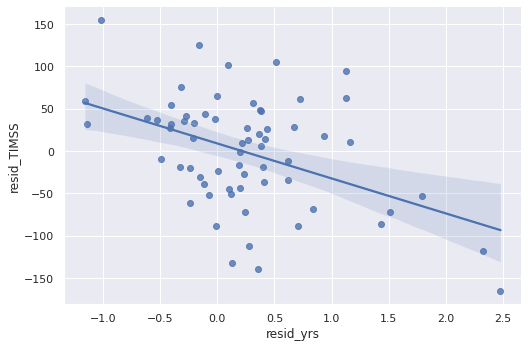

In [25]:
## Seaborn Plot
sns.lmplot(x='resid_yrs', y='resid_TIMSS', data=df4, aspect=1.5)

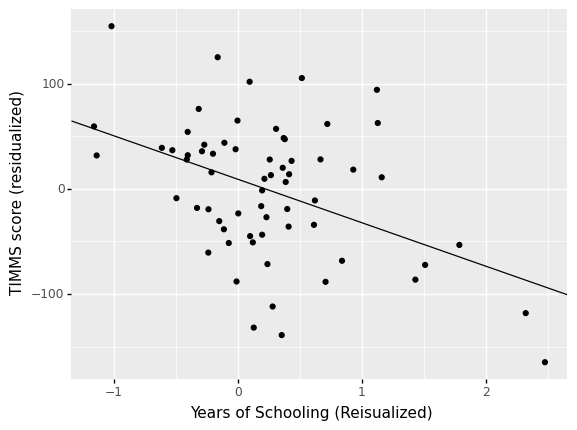

<ggplot: (8786225922949)>

In [26]:
## Asked GGPlot
ggplot(data=df4) +\
    geom_point(mapping=aes(x='resid_yrs', y='resid_TIMSS')) +\
    geom_abline(intercept=model4_res.params['Intercept'], slope=model4_res.params['resid_yrs']) +\
    labs(x='Years of Schooling (Reisualized)', y='TIMMS score (residualized)')

In [27]:
model4_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.181   
Dependent Variable: resid_TIMSS      AIC:                716.1734
Date:               2022-05-02 20:53 BIC:                720.5221
No. Observations:   65               Log-Likelihood:     -356.09 
Df Model:           1                F-statistic:        15.19   
Df Residuals:       63               Prob (F-statistic): 0.000238
R-squared:          0.194            Scale:              3463.0  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
Intercept    9.0774    7.7523   1.1709  0.2460   -6.4142   24.5691
resid_yrs  -41.3057   10.5989  -3.8972  0.0002  -62.4859  -20.1255
-----------------------------------------------------------------
Omnibus:              0.035        Durbin-Watson:           1.811
Prob(Omnibus):        0.983        Jarque-Bera (JB):        0.031
Skew:                 0.013        Prob(JB):                0.984
Kurtosis:             2.896        Condition No.:           2    
=================================================================

"""

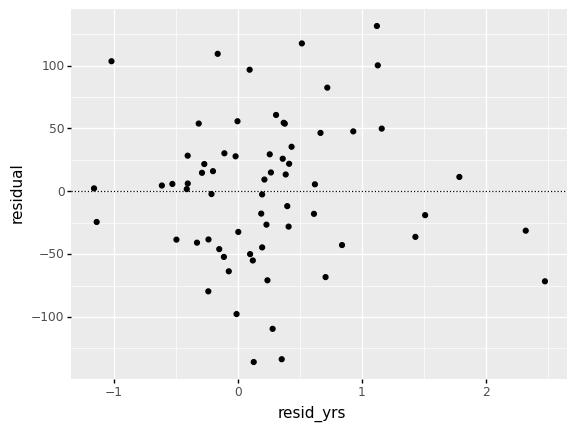

<ggplot: (8786225754221)>

In [28]:
## Residual Plot
ggplot(data=df4) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
        geom_point(mapping=aes(x=df4['resid_yrs'], y=model4_res.resid)) +\
             ylab('residual') 

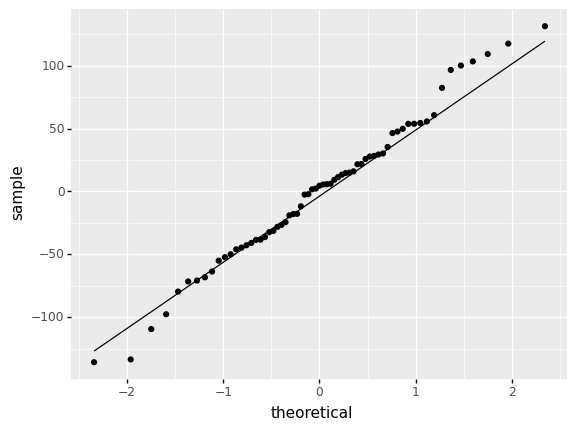

<ggplot: (8786225759302)>

In [29]:
## Quantile-Quantile Plot
ggplot(data=model4_res.resid.to_frame().rename(columns={0: 'resid'})) +\
    geom_qq(mapping=aes(sample='resid')) +\
        geom_qq_line(mapping=aes(sample='resid'))

##### Παλινδρόμηση μεταξύ των υπολοίπων των χρόνων εκπαίδευσης και του σκορ PIRLS (δ)

In [30]:
# Pearson coefficient
pearson5 = stats.pearsonr(x=df5['resid_yrs'], y=df5['resid_PIRLS'])
print('Pearson coefficient for resid_PIRLS-resid_yrs =', pearson5)

# Ols model
model5 = smf.ols("resid_PIRLS ~ resid_yrs", data=df5)
model5_res = model5.fit()
print(f"resid_PIRLS = {model5_res.params[1]}*(resid_yrs) + {model5_res.params[0]}")
print(f"Regression model R^2 = {model5_res.rsquared}")


Pearson coefficient for resid_PIRLS-resid_yrs = (-0.47924427707556594, 7.07599795621904e-05)
resid_PIRLS = -39.58937302999965*(resid_yrs) + 9.523157451374031
Regression model R^2 = 0.22967507710968205


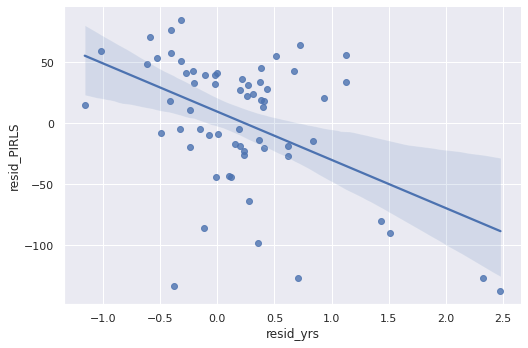

In [31]:
## Seaborn Plot
sns.lmplot(x='resid_yrs', y='resid_PIRLS', data=df5, aspect=1.5)

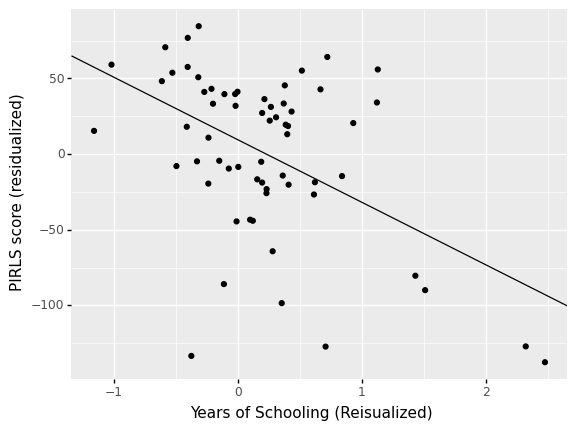

<ggplot: (8786225388758)>

In [32]:
## Asked GGPlot
ggplot(data=df5) +\
    geom_point(mapping=aes(x='resid_yrs', y='resid_PIRLS')) +\
    geom_abline(intercept=model5_res.params['Intercept'], slope=model4_res.params['resid_yrs']) +\
    labs(x='Years of Schooling (Reisualized)', y='PIRLS score (residualized)')

In [33]:
model5_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.217   
Dependent Variable: resid_PIRLS      AIC:                668.1961
Date:               2022-05-02 20:53 BIC:                672.4824
No. Observations:   63               Log-Likelihood:     -332.10 
Df Model:           1                F-statistic:        18.19   
Df Residuals:       61               Prob (F-statistic): 7.08e-05
R-squared:          0.230            Scale:              2292.0  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
Intercept    9.5232    6.3409   1.5019  0.1383   -3.1562   22.2025
resid_yrs  -39.5894    9.2831  -4.2647  0.0001  -58.1521  -21.0266
-----------------------------------------------------------------
Omnibus:               8.678        Durbin-Watson:          2.063
Prob(Omnibus):         0.013        Jarque-Bera (JB):       8.151
Skew:                  -0.752       Prob(JB):               0.017
Kurtosis:              3.920        Condition No.:          2    
=================================================================

"""

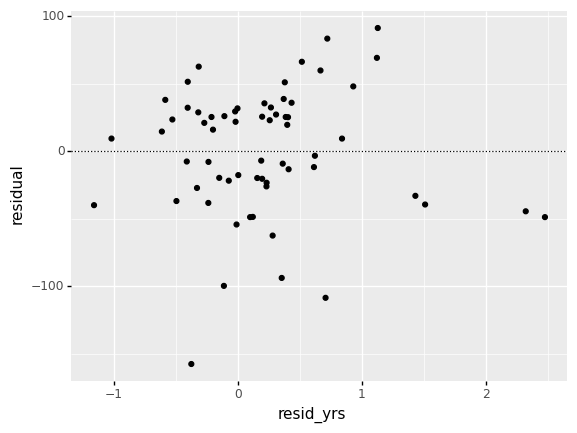

<ggplot: (8786225387033)>

In [34]:
## Residual Plot
ggplot(data=df5) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
        geom_point(mapping=aes(x=df5['resid_yrs'], y=model5_res.resid)) +\
             ylab('residual') 

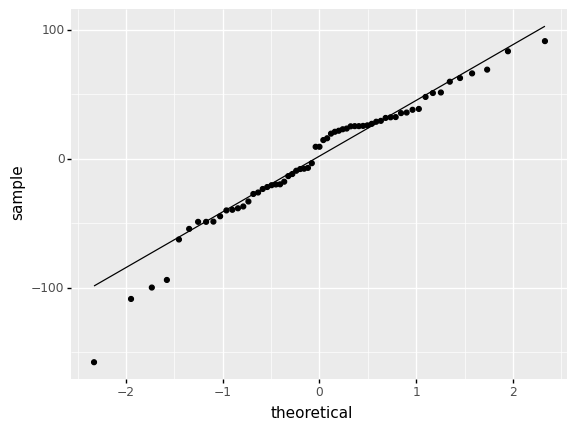

<ggplot: (8786225398977)>

In [35]:
## Quantile-Quantile Plot
ggplot(data=model5_res.resid.to_frame().rename(columns={0: 'resid'})) +\
    geom_qq(mapping=aes(sample='resid')) +\
        geom_qq_line(mapping=aes(sample='resid'))

#### Παρατηρήσεις

Αποτελέσματα παλινδρόμησης:

* Από τους συντελεστές pearson συμπερένεται πως στα δεδομένα μπορεί να υπάρχει κάποια ένδειξη γραμμικότητας.

* Από τα αποτελέσματα των μοντέλων παλινδρόμησης προκύπτουν καλές τιμές την μετρικής R^2.
    * Στο (γ) παρατηρείται `R^2 = 0.1942492763655732` άρα το μοντέλο εξηγεί το `19,42 %` της διακύμανσης των υπολοίπων `TIMSS` με βάση τα υπόλοιπα των χρόνων εκπαίδευσης.

    * Στο (δ) παρατηρείται `R^2 = 0.2296750771096816` άρα το μοντέλο εξηγεί το `22,96 %` της διακύμανσης των υπολοίπων `PIRLS` με βάση τα υπόλοιπα των χρόνων εκπαίδευσης.

* Από τα διαγράμματα υπολοίπων δεν παρατηρείται πουθενά κάποια κανονικότητα, οπότε τα δεδομένα είναι <em>ομοσκεδαστικά</em>.

* Από τα QQ διαγράμματα παρατηρείται ότι τα σημεία πέφτουν πάνω στις διαγώνιους, οπότε τα υπόλοιπά τους ακολουθούν την κανονική κατανομή.